## Stock Price Prediction 

#### Overview :

Here will be exploring data from the stock market, particularly some technology stocks (Apple, Amazon, Google, and Microsoft，Tesla and Netflix), data will be sourced from yfinance, will be performing data preprocessing, visualizing different aspects using Matplotlib, Seaborn and Plotly. 

#### Goal : 
The goal of stock prediction model is to leverage machine learning algorithms to analyze history of the stocks, identify patterns, and generate predictions about future stock prices through different modeling strategies. 

#### Data Source : 
Data is sourced from Yahoo Finance using the yfinance apis. 

#### Expected Result : 
The expected results include the development of a predictive model with the capability to forecast stock price movements. The primary goal is to provide investors and traders with valuable insights into future price trends, allowing them to make well-informed investment decisions. By accurately predicting stock price movements, this model aims to enhance investment strategies, mitigate risk, and potentially maximize financial returns.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
from pandas_datareader import data as pdr
from keras.models import Sequential

pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

from datetime import datetime
from plotly import express as px
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

### Loading the stock data

#### Below we will be sourcing data from Yahoo Finance using yfinance library which offers easy way to download the market data.

In [5]:
# For reading stock data from yahoo

yf.pdr_override()

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA', 'NFLX']

end = datetime.now()
start = datetime(end.year - 3, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN, TSLA, NFLX]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","TESLA","NETFLIX"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Open   High    Low  Close  Adj Close   Volume company_name
Date                                                                   
2023-11-27 479.03 482.00 475.35 479.17     479.17  3625900      NETFLIX
2023-11-28 478.11 480.50 475.95 479.00     479.00  2890200      NETFLIX
2023-11-29 479.00 480.99 474.49 477.19     477.19  2855500      NETFLIX
2023-11-30 475.31 478.59 470.42 473.97     473.97  4287300      NETFLIX
2023-12-01 473.17 475.23 464.60 465.74     465.74  4338100      NETFLIX
2023-12-04 460.99 461.20 451.20 453.90     453.90  5157700      NETFLIX
2023-12-05 450.70 456.39 449.58 455.15     455.15  3380700      NETFLIX
2023-12-06 460.00 460.50 445.73 446.73     446.73  4178800      NETFLIX
2023-12-07 450.85 452.89 448.32 452.00     452.00  3506700      NETFLIX
2023-12-08 450.76 455.50 450.76 453.76     453.76  3456100      NETFLIX

## Exploratory Data Analysis for Stock Prediction

### Data Overview

#####  Explore the data 

By reviewing the content of the data, we can see that the data is numeric and the date is the index of the data and it has following features.

    Date - Date      
    Open - Price from the first transaction of a trading day      
    High - Maximum price in a trading day      
    Low - Minimum price in a trading day        
    Close - Price from the last transaction of a trading day       
    Adj Close - Closing price adjusted to reflect the value after accounting for any corporate actions       
    Volume - Number of units traded in a day         
    company_name - Name of company for the stock symbol


In [6]:
# Explore the info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4524 entries, 2020-12-10 to 2023-12-08
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          4524 non-null   float64
 1   High          4524 non-null   float64
 2   Low           4524 non-null   float64
 3   Close         4524 non-null   float64
 4   Adj Close     4524 non-null   float64
 5   Volume        4524 non-null   int64  
 6   company_name  4524 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 282.8+ KB


In [7]:
# examine for missing data
df.isna().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

In [8]:
# examine for duplicate values
df.duplicated().sum()

0

In [9]:
# checking to make sure we have data for all companies listed 
df.company_name.unique()

array(['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON', 'TESLA', 'NETFLIX'],
      dtype=object)

In [10]:
df.shape

(4524, 7)

#### Dispaly summary statistics for all stocks

In [11]:
# Summary Stats for all stocks

display(HTML('<h3>AAPL Stats</h3>'))
display(AAPL.describe().style.background_gradient(cmap = 'OrRd'))

display(HTML('<h3>GOOGL Stats</h3>'))
display(GOOG.describe().style.background_gradient(cmap = 'OrRd'))

display(HTML('<h3>MICROSOFT Stats</h3>'))
display(MSFT.describe().style.background_gradient(cmap = 'OrRd'))

display(HTML('<h3>AMAZON Stats</h3>'))
display(AMZN.describe().style.background_gradient(cmap = 'OrRd'))

display(HTML('<h3>TESLA Stats</h3>'))
display(TSLA.describe().style.background_gradient(cmap = 'OrRd'))

display(HTML('<h3>NETFLIX Stats</h3>'))
display(NFLX.describe().style.background_gradient(cmap = 'OrRd'))


### Data Visualization 

#### 1. Historical view of the closing price

The close price refers to the final price at which a particular stock is traded on a given trading day. It's the last price recorded when the stock market closes for the day. A stock’s closing price is the standard benchmark used by investors, analysts and traders to track its performance over time.

The 'Adjusted Close Price' (or 'Adj Close') of a stock reflects the final price of a security after adjustments have been made for factors like dividends, stock splits, or other corporate actions that could impact the stock price. We will be using adjusted close price for analysis as this will account these additional variables that could otherwise skew the historical data.

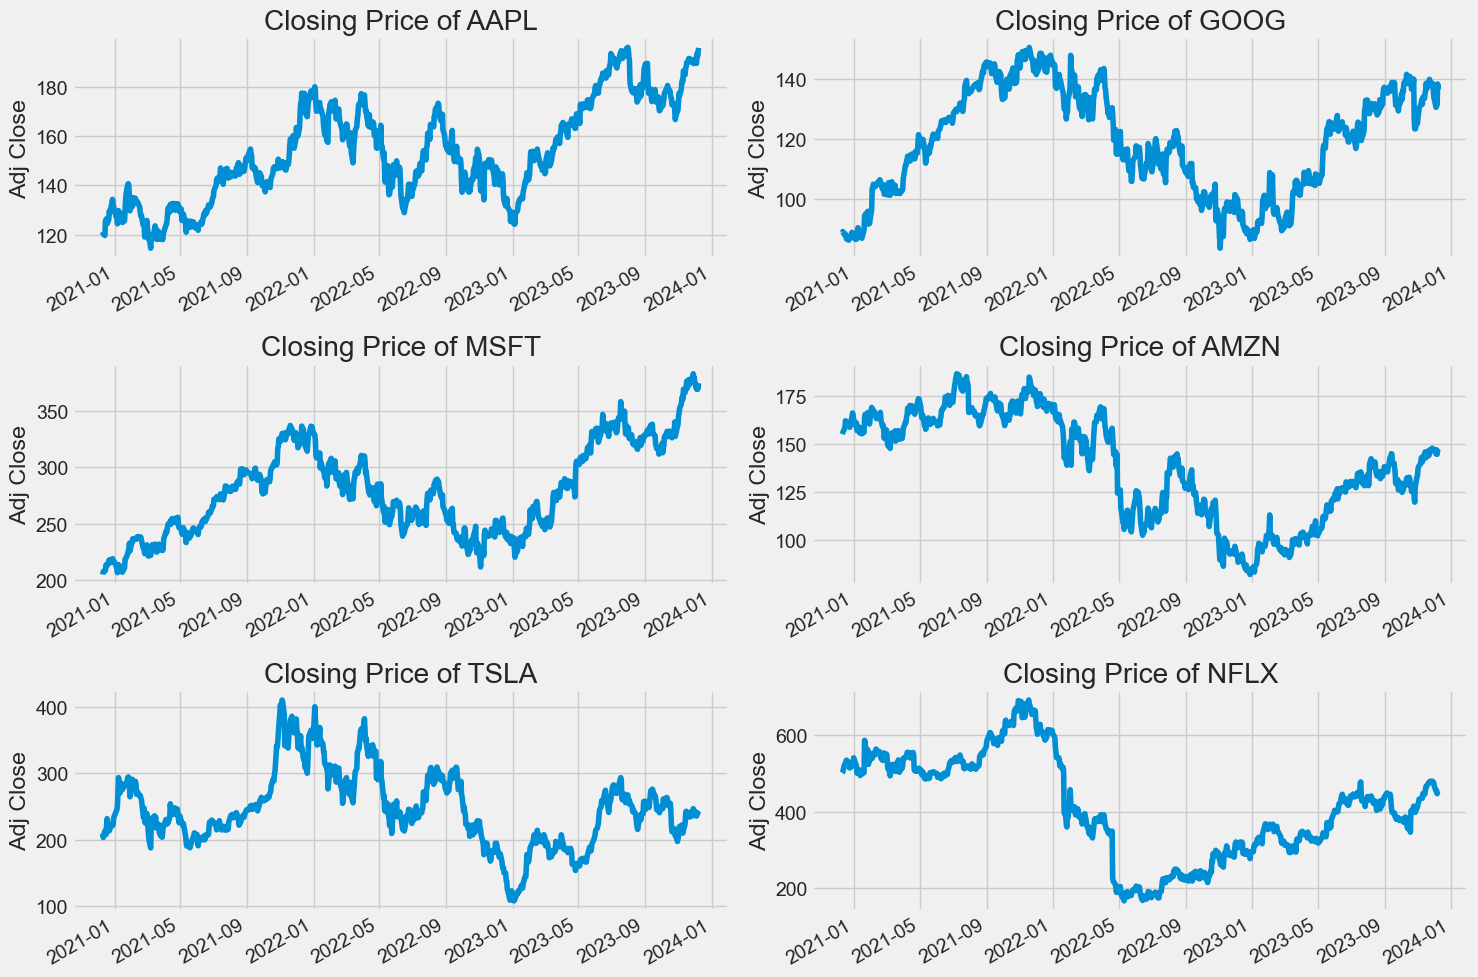

In [12]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
plt.savefig('images/closeprice.png')    
plt.tight_layout()

In [13]:
# historical view of the closing price for all stocks using plotly
import plotly.graph_objects as go

fig = go.Figure()
# Add traces for 'Adj Close' prices for each stock
for company in company_list:
  
    # Add a trace for 'Adj Close' prices
    fig.add_trace(go.Scatter(x=company.index, y=company['Adj Close'], mode='lines', name=company.company_name.unique()[0]))

fig.update_layout(title='Stocks - Adj Close Prices',
                  xaxis_title='Date',
                  yaxis_title='Adj Close Price',
                  template='plotly_dark',
                  legend=dict(title='Stocks'))
fig.write_image("images/closeprice-all.png")
fig.show()

#### 2. Open, Close and Adj Close price for all stocks

The stock open price refers to the price at which a particular stock starts trading when the stock market opens for the day. It's the first price at which the stock is traded after the market is open. 

The opening price may not necessarily be the same as the previous day's close price due to after-hours or pre-market trading and other factors can also influence the stock's opening price, including overnight news, pre-market trading activity, economic indicators, corporate announcements, and global events.

In [14]:
# Plot Open, Close and Adj Close price for all stocks
for company in company_list:
    fig = go.Figure()
    fig.add_trace(go.Scatter(x = company.index, y = company.Open,
                         name = "Open Price",
                         line = dict(color = "royalblue", width = 2)))
    fig.add_trace(go.Scatter(x = company.index, y = company.Close,
                         name = "Close Price",
                         line = dict(color = "green", width = 2)))
    fig.add_trace(go.Scatter(x = company.index, y = company['Adj Close'],
                         name = "Adj Close Price",
                         line = dict(color = "purple", width = 2)))  
    fig.update_layout(title = f"Open, Close and Adj Close Price for {company.company_name.unique()[0]}", 
                      legend_title = "Legend", xaxis_title = "Date", yaxis_title = "Price $")
    fig.write_image(f"images/open-close-{company.company_name.unique()[0]}.png")
    fig.show()

#### 3. Historical Highest and Lowest price for all stocks

Stock high and low values represent the highest and lowest prices at which a stock has traded during a specific trading period, typically a day.

The "high" refers to the peak price level reached by a stock within the trading session, while the "low" denotes the lowest price the stock has touched during the same period.

In [15]:
# Plot daily Highest and Lowest price for all stocks
for company in company_list:
    fig = go.Figure()
    fig.add_trace(go.Scatter(x = company.index, y = company.High,
                         name = "Highest Price",
                         line = dict(color = "firebrick", width = 2)))
    fig.add_trace(go.Scatter(x = company.index, y = company.Low,
                         name = "Lowest Price",
                         line = dict(color = "orange", width = 2)))
    fig.update_layout(title = f"Maximum and Minimum Prices for {company.company_name.unique()[0]}", legend_title = "Legend",
                  xaxis_title = "Date", yaxis_title = "Price $")  
    fig.write_image(f"images/high-low-{company.company_name.unique()[0]}.png")
    fig.show()
    

#### 4. Total volume of stock traded each day

The volume of a stock refers to the total number of shares that have been traded over a specific period, typically within a day. It represents the level of activity or the amount of buying and selling of a particular stock within a given timeframe.

Traders often use volume indicators alongside price data to make more informed decisions about buying or selling a stock. Understanding the dynamics of volume can provide valuable insights into market sentiment and potential future price movements.

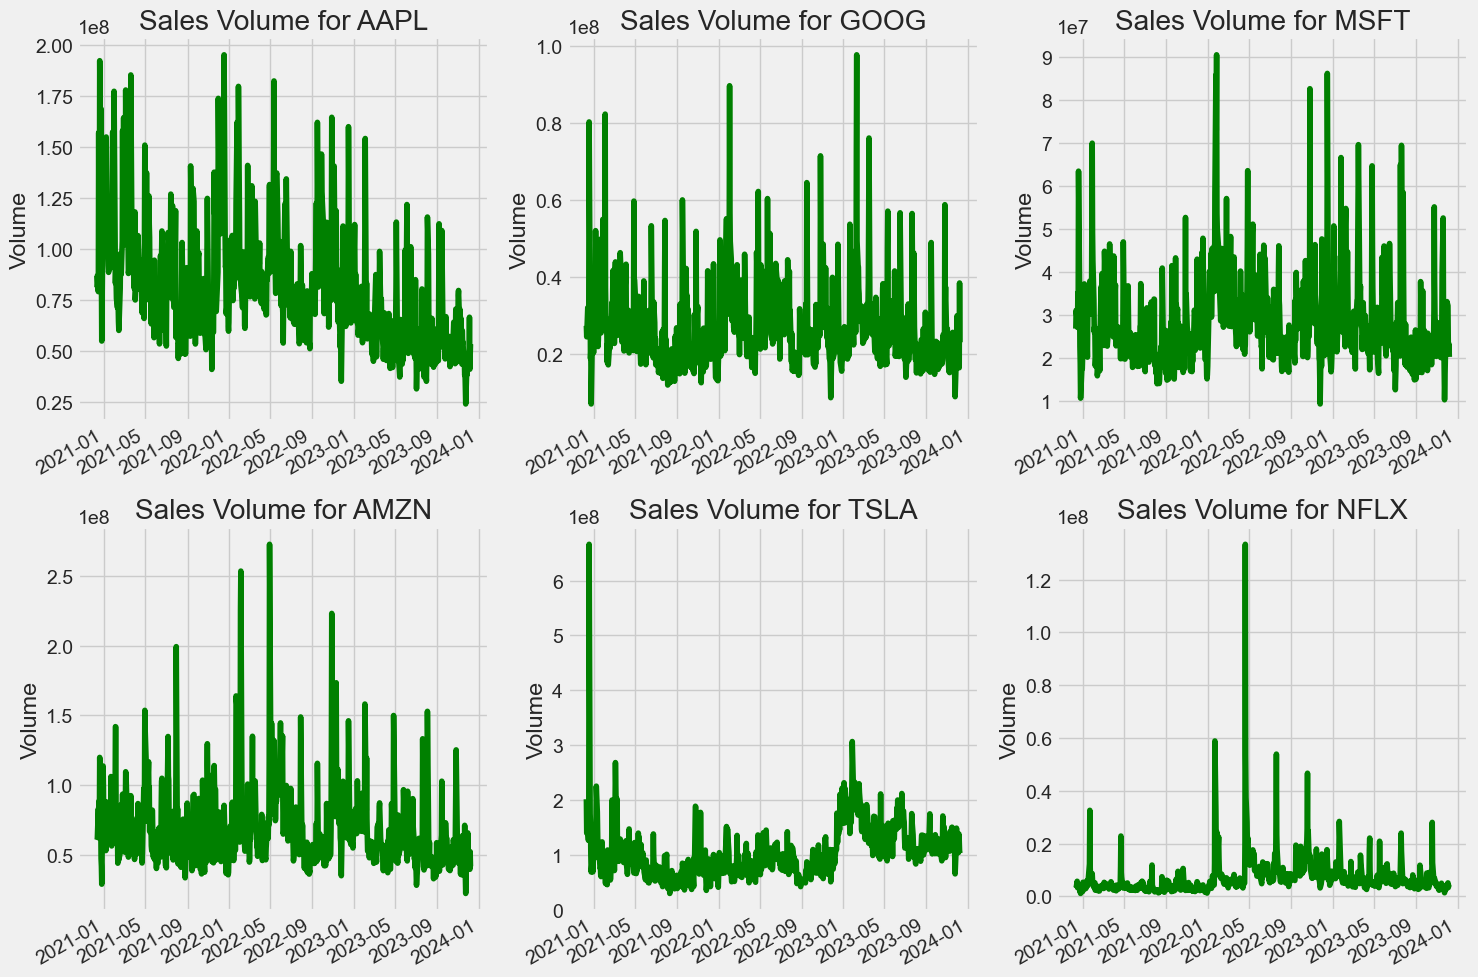

In [81]:
# Plot total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 3, i)
    company['Volume'].plot(color='g')
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
plt.savefig('images/volume.png')  
plt.tight_layout()

5. #### Find the moving average of each stock

The moving average (MA) a calculation that helps reduce noise in price data by creating a single, smoothed line that helps analysts and traders identify potential price trends over a specified period. A moving average is calculated by averaging a set of past data points within a specific time frame, creating a line that moves along with the stock's price movements. 
    
Traders often use moving averages to identify potential buy or sell signals. For instance, when the stock price crosses above the moving average line, it might indicate a bullish trend, while a crossing below could suggest a bearish trend.

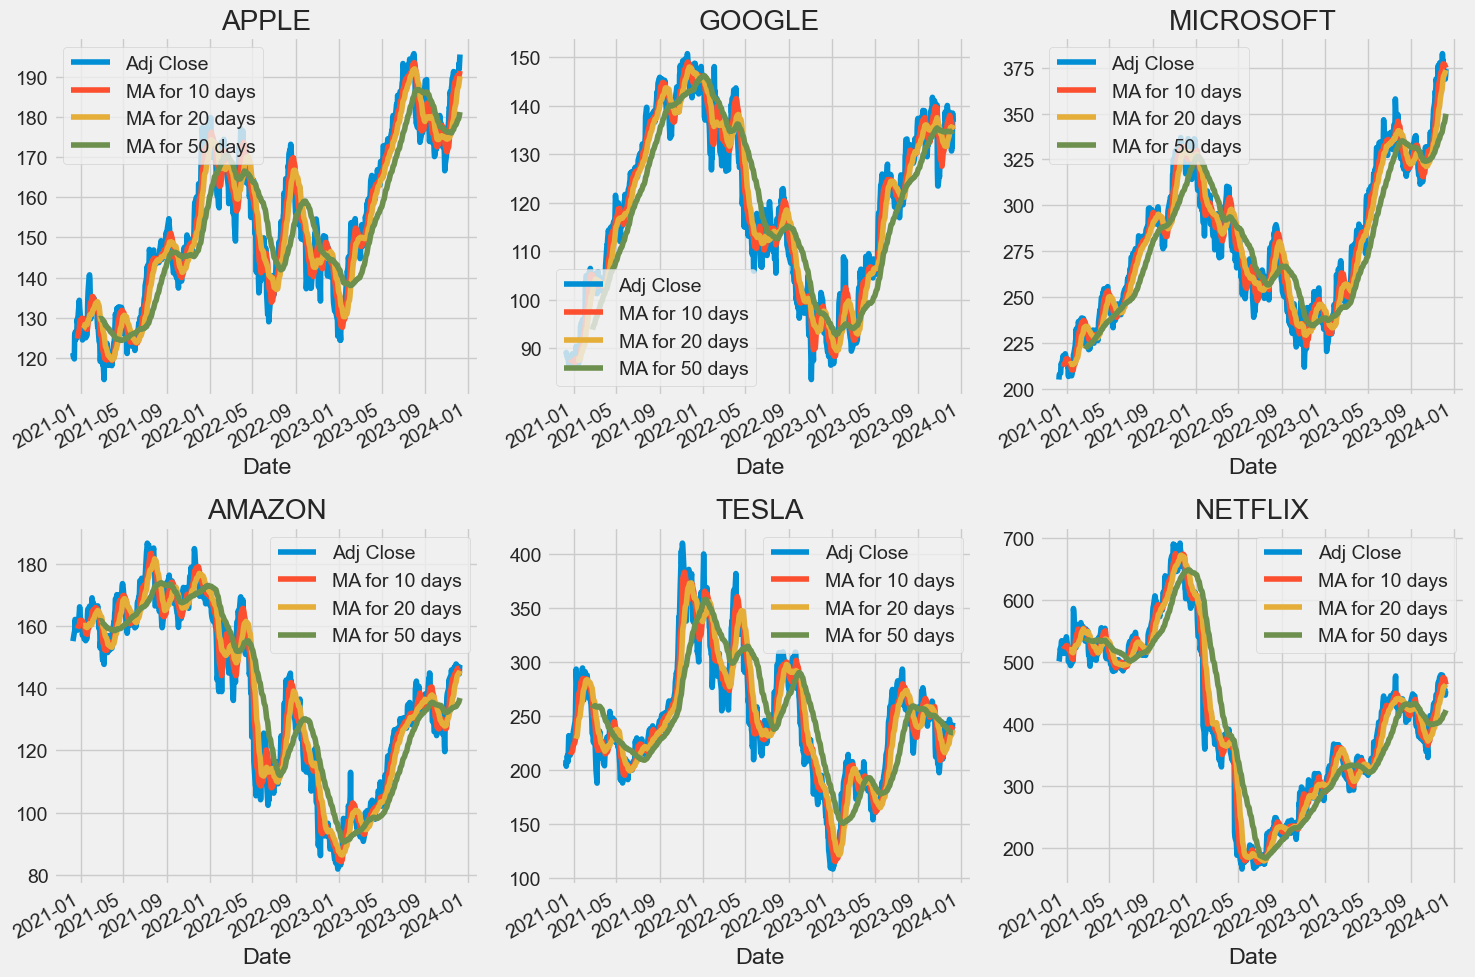

In [84]:
# Moving Average of each stock
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,2])
axes[0,2].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('AMAZON')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('TESLA')

NFLX[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,2])
axes[1,2].set_title('NETFLIX')

plt.savefig("images/moving-avg.png")
fig.tight_layout()

#### 6. Daily Return of the Stock

Plot the daily return of the stock in order to analyze the risk of the stock.

The daily return of a stock refers to the percentage change in its price from one trading day to the next. It's a measure used to assess the performance of a stock on a daily basis. It's a fundamental metric for evaluating a stock's short-term performance.

Large daily returns indicate higher volatility, suggesting that the stock's price is fluctuating significantly within short periods, higher daily volatility potentially indicating higher risk.

 Investors and analysts often compare the daily returns of different stocks or the same stock against a benchmark (like an index) to gauge relative performance.


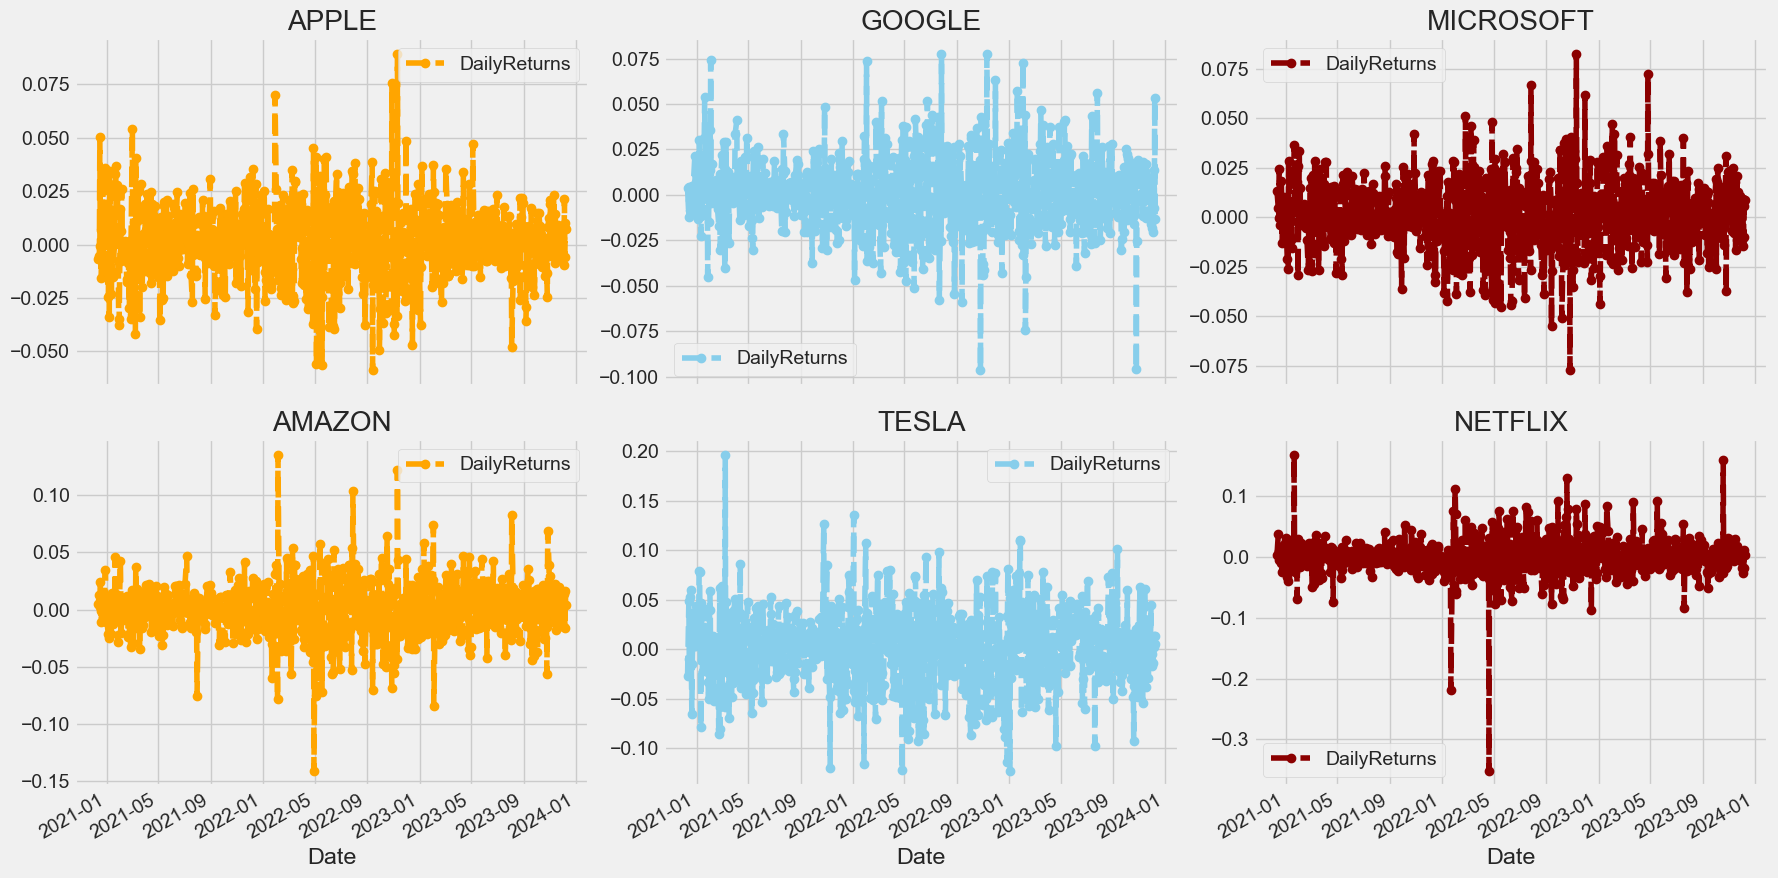

In [85]:
# Daily return of the each stock
for company in company_list:
    company['DailyReturns'] = company['Adj Close'].pct_change()
        
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18,9), sharex=True)

AAPL['DailyReturns'].plot(ax=axs[0,0], legend=True, linestyle='--', marker='o', color='orange')
axs[0,0].set_title('APPLE')

GOOG['DailyReturns'].plot(ax=axs[0,1], legend=True, linestyle='--', marker='o', color='skyblue')
axs[0,1].set_title('GOOGLE')

MSFT['DailyReturns'].plot(ax=axs[0,2], legend=True, linestyle='--', marker='o', color='darkred')
axs[0,2].set_title('MICROSOFT')

AMZN['DailyReturns'].plot(ax=axs[1,0], legend=True, linestyle='--', marker='o', color='orange')
axs[1,0].set_title('AMAZON')

TSLA['DailyReturns'].plot(ax=axs[1,1], legend=True, linestyle='--', marker='o', color='skyblue')
axs[1,1].set_title('TESLA')

NFLX['DailyReturns'].plot(ax=axs[1,2], legend=True, linestyle='--', marker='o', color='darkred')
axs[1,2].set_title('NETFLIX')
plt.savefig('images/daily-returns.png')
fig.tight_layout()

###### Now let's get an overall look at the average daily return using a histogram. We will use seaborn to create both a histogram and kde plot on the same figure.

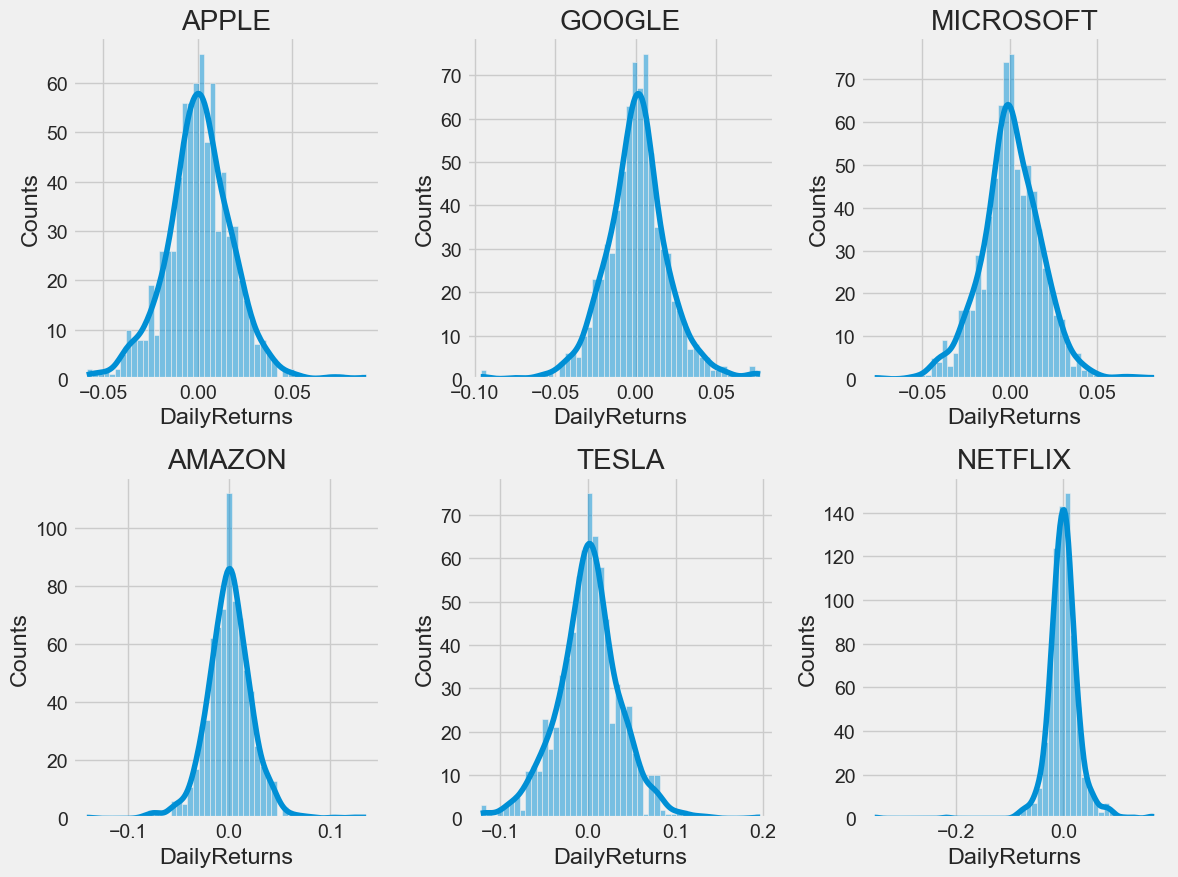

In [274]:
# Average Daily Return
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 3, i)
    sns.histplot(company['DailyReturns'], bins=50, kde=True)
    #company['DailyReturns'].hist(bins=50)
    plt.xlabel('DailyReturns')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
plt.savefig('images/daily-return-hist')    
plt.tight_layout()

#### 7. Correlation between different stocks

We can compare the correlation between the stocks to explore the relationships between various financial instruments, economic indicators, or any other relevant factors that could impact stock prices. It can be done using the seaborn pairplot and correlation heatmap.

In [20]:
# Get closing prices for the tech stock list into single DataFrame

adj_closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_returns = adj_closing_df.pct_change()
tech_returns.head()

[*********************100%%**********************]  6 of 6 completed


AAPL  AMZN  GOOG  MSFT  NFLX  TSLA
Date                                          
2020-12-10   NaN   NaN   NaN   NaN   NaN   NaN
2020-12-11 -0.01  0.00  0.00  0.01  0.00 -0.03
2020-12-14 -0.01  0.01 -0.01  0.00  0.04  0.05
2020-12-15  0.05  0.00  0.00 -0.00 -0.01 -0.01
2020-12-16 -0.00  0.02 -0.00  0.02  0.01 -0.02

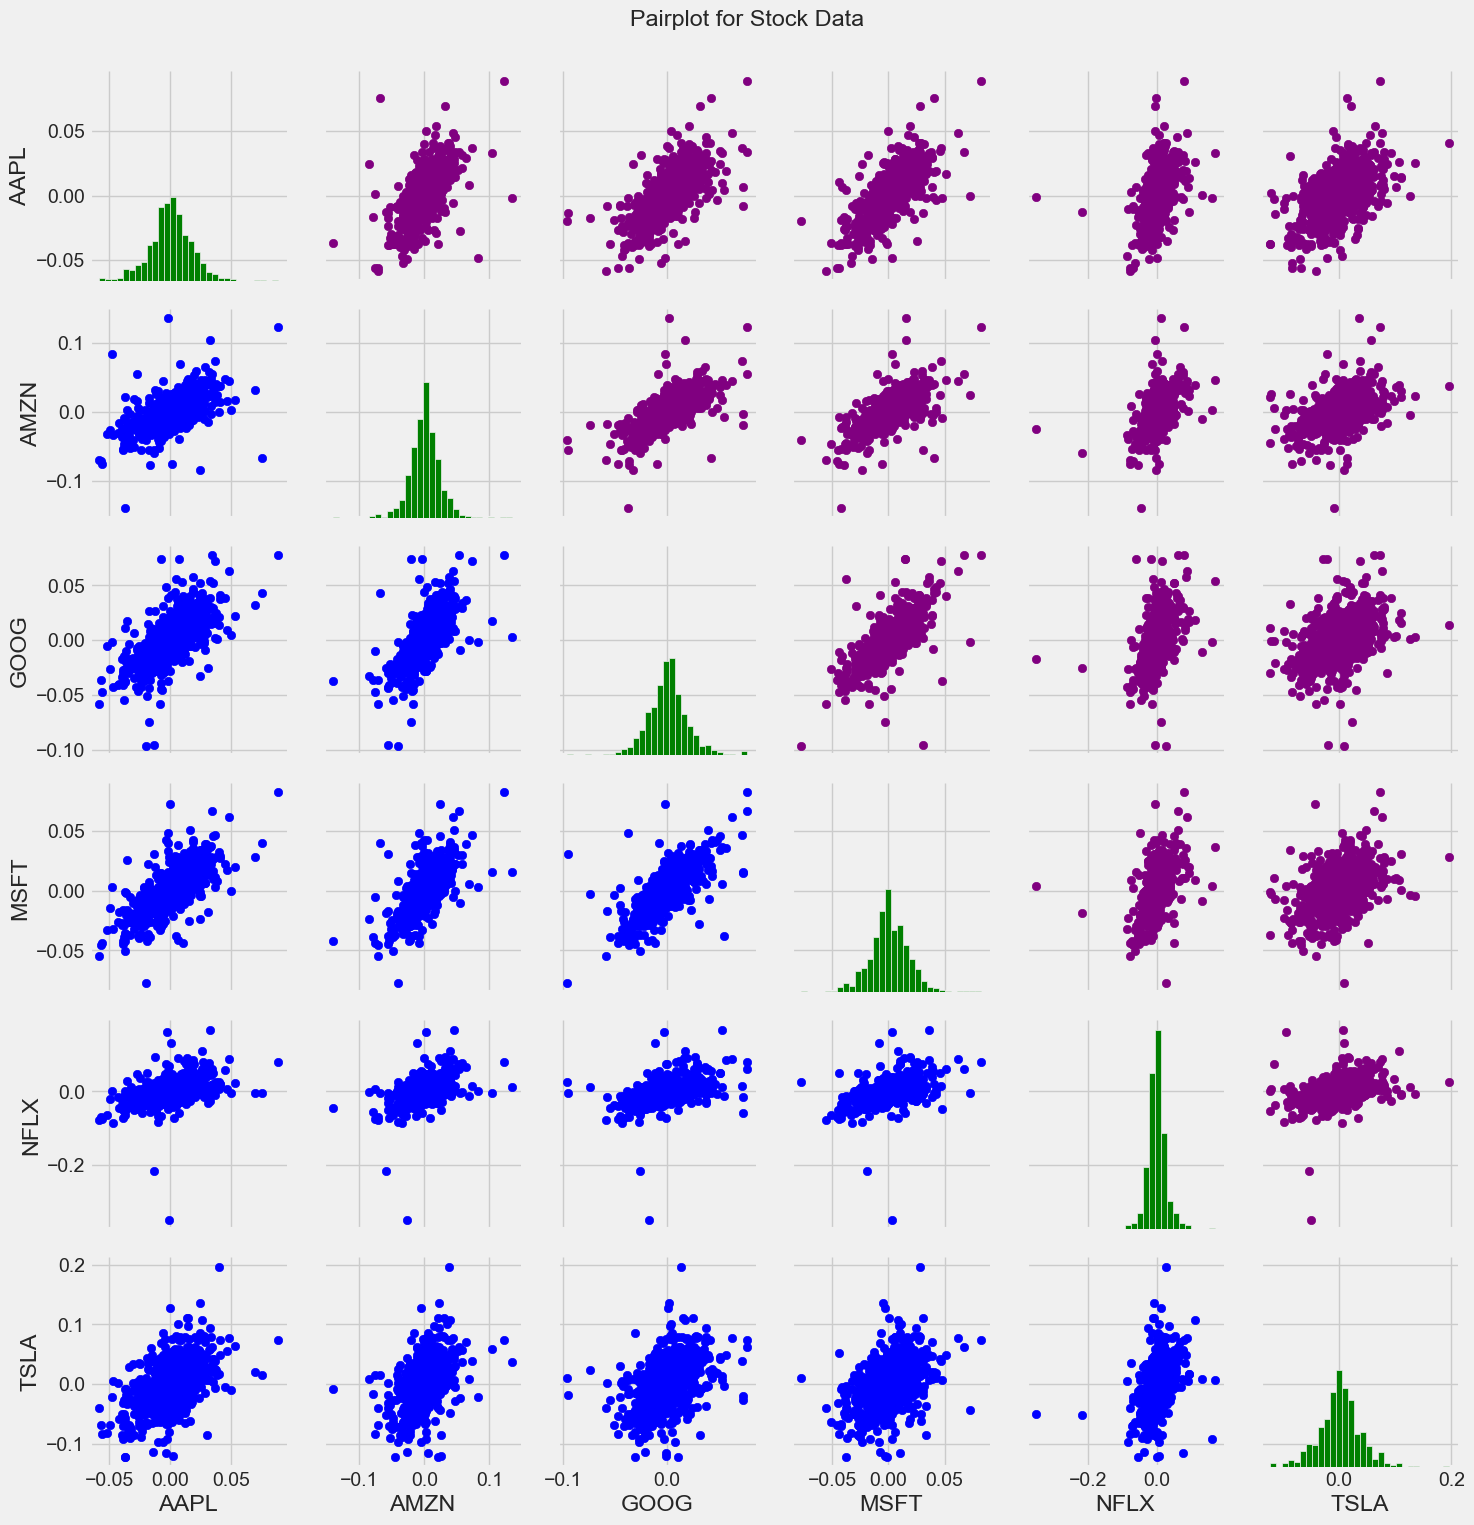

In [271]:
# create a pairgrid to view correlations between stocks.
grid = sns.PairGrid(tech_returns.dropna())
grid.map_upper(plt.scatter, color='purple')
grid.map_lower(plt.scatter, color='blue')

# Diagonal: Histograms
grid.map_diag(plt.hist, bins=30, color='green')
plt.suptitle('Pairplot for Stock Data', y=1.02)
plt.savefig('images/pairplot')
plt.show()

Above we can see the correlation between all tech stocks, it appears that AAPL and MSFT, GOOGL and MSFT are strongly coorelated from their daily returns. We can also verify and compare the correlation between the stocks using correlation matrix.

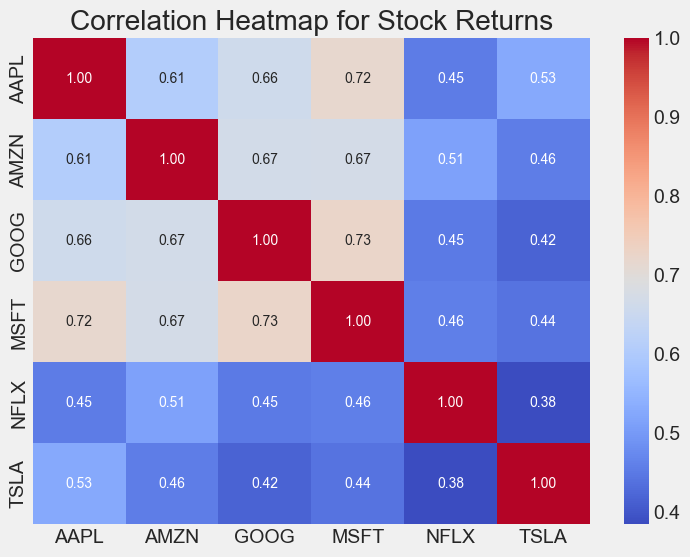

In [88]:
# Plot heatmap for correlations between stocks
correlation_matrix = tech_returns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Heatmap for Stock Returns')
plt.savefig('images/heatmap')
plt.show()

As it appeared in the paiplot, AAPL and MSFT, GOOGL and MSFT had strongest correlation of daily return.

#### 8. Risk vs Return of the stock

Risk and return in stocks is fundamental to investment analysis, it's a trade-off between the potential for higher returns and the level of risk an investor must undertake.

**Return:** Refers to the gain or loss generated on an investment.    
**Risk:** Represents the uncertainty or volatility associated with an investment.

The risk-return trade-off suggests that higher potential returns usually come with higher levels of risk. Risk vs return of the stock is commonly calculated using stock's historical returns and standard deviation to measure volatility, higher standard deviation indicates greater variability in returns, implying higher risk.

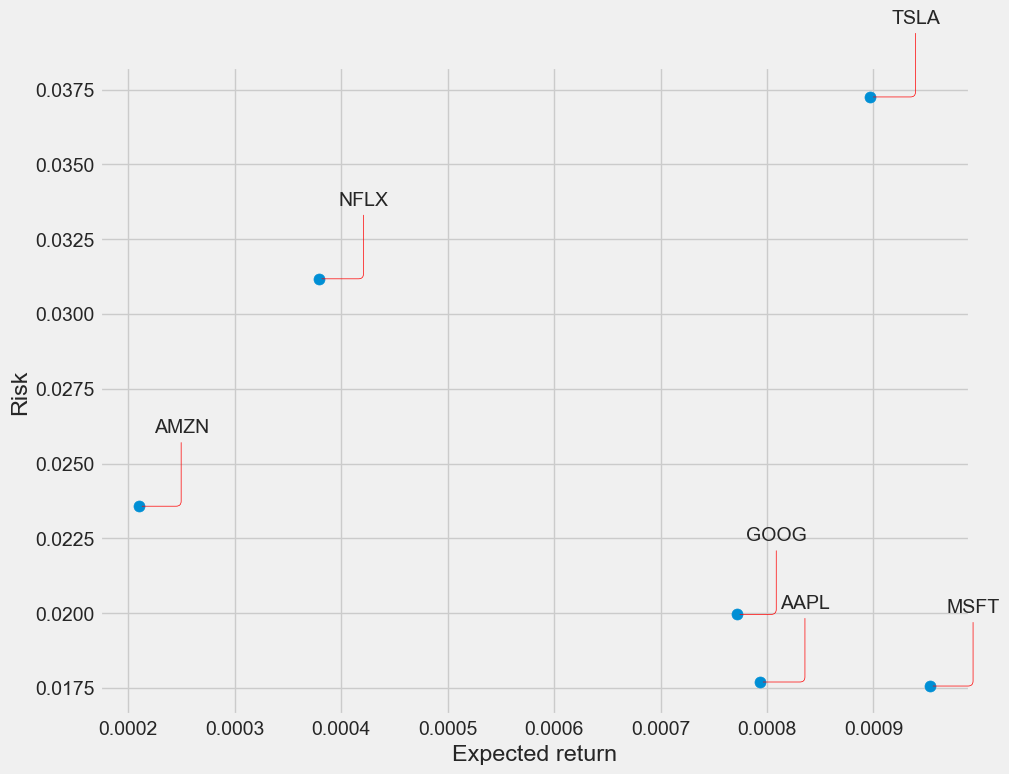

In [89]:
# Risk vs Return for each stock

returns = tech_returns.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(returns.mean(), returns.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='red', connectionstyle='angle,rad=5'))
plt.savefig('images/risk-return')

##### Comparison of daily returns between stocks

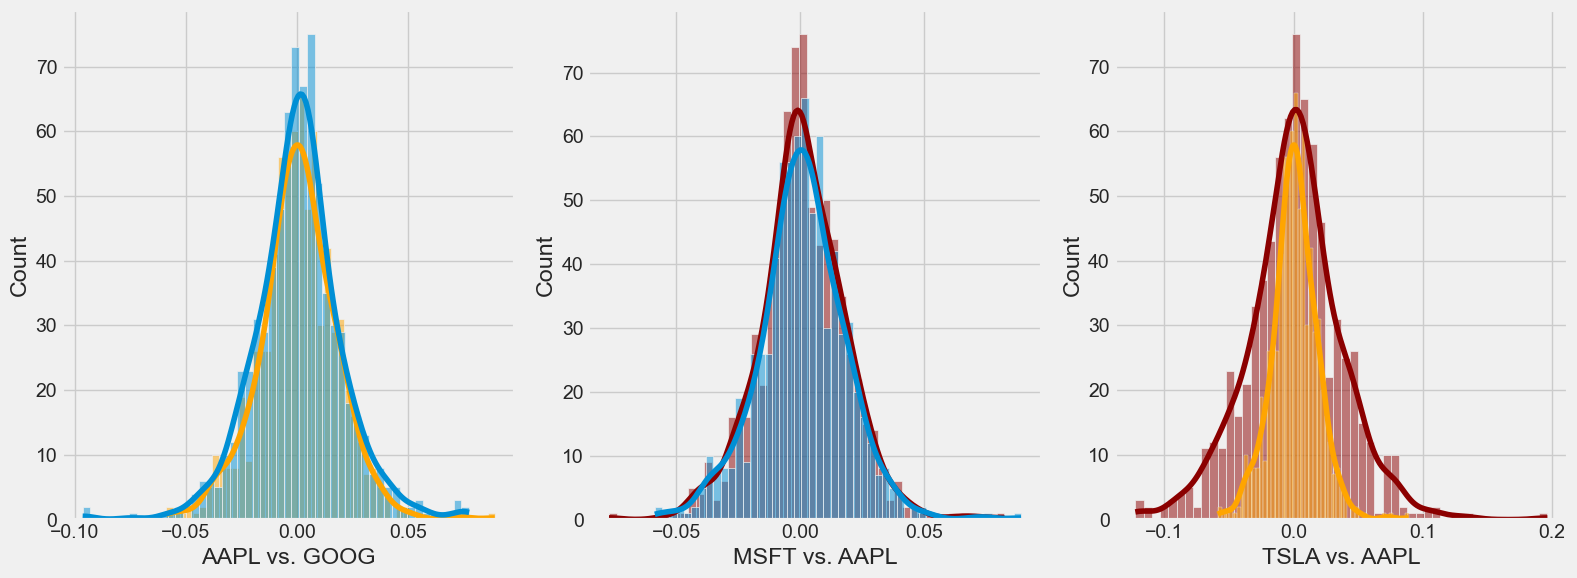

In [90]:
# Daily return comparison between stocks
fig, ax = plt.subplots(1,3, figsize=(16,6))
sns.histplot(tech_returns.AAPL, bins=50, color='orange', ax=ax[0], kde=True)
sns.histplot(tech_returns.GOOG, bins=50, ax=ax[0], kde=True)
ax[0].set_xlabel('AAPL vs. GOOG')

sns.histplot(tech_returns.MSFT, bins=50, color='darkred', ax=ax[1], kde=True)
sns.histplot(tech_returns.AAPL,  bins=50, ax=ax[1], kde=True)
ax[1].set_xlabel('MSFT vs. AAPL')

sns.histplot(tech_returns.TSLA, bins=50, color='darkred', ax=ax[2], kde=True)
sns.histplot(tech_returns.AAPL, bins=50, ax=ax[2], color='orange', kde=True, alpha=0.5)
ax[2].set_xlabel('TSLA vs. AAPL')
plt.savefig('images/daily-return-comparison')
plt.tight_layout();

From the above plot, it's evident that the daily returns for AAPL/GOOG and MSFT/AAPL were relatively similar. However, TSLA exhibited higher daily returns in comparison to AAPL

### Build Models

In [277]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
pd.set_option('display.max_colwidth', None)
import time

In [76]:
# adj close price dataset used to build models
adj_closing_df.head()

AAPL   AMZN  GOOG   MSFT   NFLX   TSLA
Date                                               
2020-12-10 121.10 155.07 88.77 205.01 501.09 209.02
2020-12-11 120.29 155.82 89.09 207.68 503.22 203.33
2020-12-14 119.67 157.85 88.00 208.60 522.42 213.28
2020-12-15 125.66 158.26 88.39 208.53 519.78 211.08
2020-12-16 125.59 162.05 88.15 213.54 524.83 207.59

### Functions to get dataset for given stock ticker, create training/test data, process result and train model 

1. **get_dataset  -** function that returns the dataset with adj close price for the given stock ticker
2. **train_test_data -** splits training and test dataset for the given dataset
3. **process_result -** process the results of the model rmse, score, best_params into result list which can be added to result dataframe
4. **train_model -** performs GridSearchCV using the given model/estimator, fits training data, make prediction on the test data, evaluates the model performance and extract rmse, score and process the result.

In [77]:
# Function to get dataset with close price for the ticker passed
def get_dataset(ticker):
    df = adj_closing_df[[ticker]]
    df.reset_index(inplace=True)
    df.columns = ['Date', 'Price']
    # Feature engineering: adding a column for days since the start date
    df['Days'] = (df['Date'] - df['Date'].min()).dt.days
    return df
   
# Function to split the data into training and testing sets
def train_test_data(df):    
    X = df[['Days']]
    y = df['Price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test
    

In [102]:
# Create result dataframe to hold all model results
# Define function to process the results into result list

model_result_df = []
model_result_df = pd.DataFrame(columns=['Company_name', 'Model', 'RMSE','Score', 'Best Params', 'Train Time'])

def process_result(model, ticker, rmse, score, best_params, train_time):
    result=[]
    result.append(ticker)
    result.append(model)
    result.append('%.2f' % rmse)
    result.append('%.2f' % score)
    result.append(best_params)
    result.append('%.2f' % train_time)    
    return result

In [103]:
'''function takes type model, params, traing/test data and performs the grid search with supplied model and params
generates predction, rmse and score on the best estimator, pass the details to process_result function and returns the 
the result list '''

def train_model(model, params, ticker, X_train, X_test, y_train, y_test):
    start_time = time.time()
    # Initialize GridSearchCV with the model and parameters
    grid_search = GridSearchCV(model, params, cv=5)
    # Fit the GridSearchCV to the training data
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    # Get the best parameters and the best estimator
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    # Make predictions    
    y_pred = best_model.predict(X_test)
    # Model evaluation
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    score = r2_score(y_test, y_pred)*100
    train_time = end_time - start_time 
    result = process_result(type(model).__name__ ,  ticker, rmse, score, best_params, train_time)
    return result

#### Predicting AAPL Stock price

In [105]:
# Predict AAPL stock price

#get dataset and create training/test data
ticker = 'AAPL'
df = get_dataset(ticker)
X_train, X_test, y_train, y_test = train_test_data(df)

# LinearRegression model
lnr_params = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
}
linear_result = train_model(LinearRegression(), lnr_params, ticker, X_train, X_test, y_train, y_test )
model_result_df.loc[len(model_result_df)] = linear_result

# KNeighborsRegressor model
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  
}
knn_result = train_model(KNeighborsRegressor(), knn_params, ticker, X_train, X_test, y_train, y_test )
model_result_df.loc[len(model_result_df)] = knn_result


# RandomForestRegressor model
rf_params = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}
rf_result = train_model(RandomForestRegressor(), rf_params, ticker, X_train, X_test, y_train, y_test )
model_result_df.loc[len(model_result_df)] = rf_result


In [106]:
model_result_df

Company_name                  Model   RMSE  Score  \
0         AAPL       LinearRegression  12.87  62.17   
1         AAPL    KNeighborsRegressor   2.22  98.88   
2         AAPL  RandomForestRegressor   2.30  98.79   

                                         Best Params Train Time  
0        {'fit_intercept': True, 'normalize': False}       0.13  
1  {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}       0.45  
2  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...     170.30

#### Predicting GOOG Stock price

In [107]:
# Predict GOOG stock price

#get dataset and create training/test data
ticker = 'GOOG'
df = get_dataset(ticker)
X_train, X_test, y_train, y_test = train_test_data(df)

# LinearRegression model
lnr_params = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
}
linear_result = train_model(LinearRegression(), lnr_params, ticker, X_train, X_test, y_train, y_test )
model_result_df.loc[len(model_result_df)] = linear_result

# KNeighborsRegressor model
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  
}
knn_result = train_model(KNeighborsRegressor(), knn_params, ticker, X_train, X_test, y_train, y_test )
model_result_df.loc[len(model_result_df)] = knn_result


# RandomForestRegressor model
rf_params = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}
rf_result = train_model(RandomForestRegressor(), rf_params, ticker, X_train, X_test, y_train, y_test )
model_result_df.loc[len(model_result_df)] = rf_result

In [108]:
model_result_df

Company_name                  Model   RMSE  Score  \
0         AAPL       LinearRegression  12.87  62.17   
1         AAPL    KNeighborsRegressor   2.22  98.88   
2         AAPL  RandomForestRegressor   2.30  98.79   
3         GOOG       LinearRegression  16.45  -1.15   
4         GOOG    KNeighborsRegressor   2.10  98.35   
5         GOOG  RandomForestRegressor   2.19  98.21   

                                         Best Params Train Time  
0        {'fit_intercept': True, 'normalize': False}       0.13  
1  {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}       0.45  
2  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...     170.30  
3         {'fit_intercept': True, 'normalize': True}       0.13  
4  {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}       0.47  
5  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...     170.82

#### Predicting MSFT Stock price

In [110]:
# Predict MSFT stock price

#get dataset and create training/test data
ticker = 'MSFT'
df = get_dataset(ticker)
X_train, X_test, y_train, y_test = train_test_data(df)

# LinearRegression model
lnr_params = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
}
linear_result = train_model(LinearRegression(), lnr_params, ticker, X_train, X_test, y_train, y_test )
model_result_df.loc[len(model_result_df)] = linear_result

# KNeighborsRegressor model
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  
}
knn_result = train_model(KNeighborsRegressor(), knn_params, ticker, X_train, X_test, y_train, y_test )
model_result_df.loc[len(model_result_df)] = knn_result


# RandomForestRegressor model
rf_params = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}
rf_result = train_model(RandomForestRegressor(), rf_params, ticker, X_train, X_test, y_train, y_test )
model_result_df.loc[len(model_result_df)] = rf_result

In [111]:
model_result_df

Company_name                  Model   RMSE  Score  \
0         AAPL       LinearRegression  12.87  62.17   
1         AAPL    KNeighborsRegressor   2.22  98.88   
2         AAPL  RandomForestRegressor   2.30  98.79   
3         GOOG       LinearRegression  16.45  -1.15   
4         GOOG    KNeighborsRegressor   2.10  98.35   
5         GOOG  RandomForestRegressor   2.19  98.21   
6         MSFT       LinearRegression  31.74  40.34   
7         MSFT    KNeighborsRegressor   4.69  98.70   
8         MSFT  RandomForestRegressor   4.69  98.70   

                                         Best Params Train Time  
0        {'fit_intercept': True, 'normalize': False}       0.13  
1  {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}       0.45  
2  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...     170.30  
3         {'fit_intercept': True, 'normalize': True}       0.13  
4  {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}       0.47  
5  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...     170.82  
6         {'fit_intercept': True, 'normalize': True}       0.14  
7  {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}       0.47  
8  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...     187.35

#### Predicting AMZN Stock price

In [112]:
# Predict AMZN stock price

#get dataset and create training/test data
ticker = 'AMZN'
df = get_dataset(ticker)
X_train, X_test, y_train, y_test = train_test_data(df)

# LinearRegression model
lnr_params = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
}
linear_result = train_model(LinearRegression(), lnr_params, ticker, X_train, X_test, y_train, y_test )
model_result_df.loc[len(model_result_df)] = linear_result

# KNeighborsRegressor model
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  
}
knn_result = train_model(KNeighborsRegressor(), knn_params, ticker, X_train, X_test, y_train, y_test )
model_result_df.loc[len(model_result_df)] = knn_result


# RandomForestRegressor model
rf_params = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}
rf_result = train_model(RandomForestRegressor(), rf_params, ticker, X_train, X_test, y_train, y_test )
model_result_df.loc[len(model_result_df)] = rf_result

In [278]:
model_result_df

Company_name                  Model   RMSE  Score  \
0          AAPL       LinearRegression  12.87  62.17   
1          AAPL    KNeighborsRegressor   2.22  98.88   
2          AAPL  RandomForestRegressor   2.30  98.79   
3          GOOG       LinearRegression  16.45  -1.15   
4          GOOG    KNeighborsRegressor   2.10  98.35   
5          GOOG  RandomForestRegressor   2.19  98.21   
6          MSFT       LinearRegression  31.74  40.34   
7          MSFT    KNeighborsRegressor   4.69  98.70   
8          MSFT  RandomForestRegressor   4.69  98.70   
9          AMZN       LinearRegression  18.90  41.85   
10         AMZN    KNeighborsRegressor   2.55  98.94   
11         AMZN  RandomForestRegressor   2.56  98.93   

                                                                                Best Params  \
0                                               {'fit_intercept': True, 'normalize': False}   
1                                         {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}   
2     {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}   
3                                                {'fit_intercept': True, 'normalize': True}   
4                                         {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}   
5     {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}   
6                                                {'fit_intercept': True, 'normalize': True}   
7                                         {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}   
8     {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}   
9                                                {'fit_intercept': True, 'normalize': True}   
10                                        {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}   
11  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}   

   Train Time  
0        0.13  
1        0.45  
2      170.30  
3        0.13  
4        0.47  
5      170.82  
6        0.14  
7        0.47  
8      187.35  
9        0.22  
10       0.77  
11     326.67

Based on the regression model outcomes above, both the KNeighborsRegressor and RandomForestRegressor demonstrated better performance, achieving scores exceeding 98%.

### Build time series ARIMA model for stock price prediction 

ARIMA models are suitable for analyzing time series data by capturing temporal dependencies, trends, and seasonality in the data. ARIMA comprises parameters (p, d, q) representing autoregression, differencing, and moving average components, respectively. 

Following are the steps taken to create an ARIMA model.

- Extract the AAPL stock price data from the dataset for prediction
- Check if the dataset is stationary
- If the dataset is not stationary, make it stationary
- Split the data into training and test sets
- Create and evaluate ARIMA model with range of p, d, q values to find the best order with lower RMSE
- Create and fit ARIMA model for the best order
- Forecast the stock price and find the RMSE
- Plot the model result

In [226]:
# import packages for time series
import warnings
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error
warnings.filterwarnings('ignore')

In [193]:
# function to verify if the timeseries is stationary
def test_stationarity(timeseries):
    stationary = True;
    result = adfuller(timeseries)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')    
    if result[1] < 0.05:
        print('Series is stationary')
    else:
        print('Series is not stationary')
        stationary = False
    return stationary        

In [194]:
# Fetch the AAPL price from the dataset and check if its stationary
df = adj_closing_df[['AAPL']]
df = df.asfreq('B', method='ffill') 
stationary = test_stationarity(df)

ADF Statistic: -1.5742179831998355
p-value: 0.4965303952685546
Series is not stationary


In [196]:
# If the dataset is not stationary, make it stationary
df_stationary = df
if not stationary:
    print('converting the data to stationary')
    df_stationary = df.diff().dropna()  
stationary = test_stationarity(df_stationary)

converting the data to stationary
ADF Statistic: -28.0887164737681
p-value: 0.0
Series is stationary


In [197]:
# split dataset into training and test data
train_size = int(len(df_stationary) * 0.8)
train, test = df_stationary.iloc[:train_size], df_stationary.iloc[train_size:]

In [198]:
# Define a function to evaluate ARIMA model with given parameters
def evaluate_arima(order, train_data, test_data):
    model = ARIMA(train_data, order=order)
    fitted = model.fit()
    fc = fitted.forecast(len(test_data))
    rmse = np.sqrt(np.mean((fc - test_data.values.flatten())**2))  # Root Mean Squared Error (RMSE)
    return rmse

# Define ranges for p, d, q values
p_values = range(0, 5)
d_values = range(0, 3)
q_values = range(0, 5)

best_rmse, best_order = float('inf'), None

# Search for best order parameters
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
                rmse = evaluate_arima(order, train, test)
                if rmse < best_rmse:
                    best_rmse, best_order = rmse, order
            except:
                continue

print(f"Best Order: {best_order} with RMSE: {best_rmse}")

Best Order: (4, 2, 4) with RMSE: 2.1338601689163736


In [229]:
# Fit ARIMA model for the best order from above
model = ARIMA(train, order=(4, 2, 4))  
fitted = model.fit()

print(fitted.summary())

# Forecast the stock price
fc = fitted.forecast(len(test))
rmse = np.sqrt(np.mean((fc - test.values.flatten())**2))
mae = mean_absolute_error(fc, test.values.flatten())

print(f"RMSE for ARIMA: {rmse}")
print(f"MAE for ARIMA: {mae}")

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  624
Model:                 ARIMA(4, 2, 4)   Log Likelihood               -1510.437
Date:                Wed, 13 Dec 2023   AIC                           3038.875
Time:                        23:48:29   BIC                           3078.771
Sample:                    12-11-2020   HQIC                          3054.380
                         - 05-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8109      0.038    -47.099      0.000      -1.886      -1.736
ar.L2         -1.0740      0.077    -13.877      0.000      -1.226      -0.922
ar.L3         -0.1239      0.082     -1.519      0.1

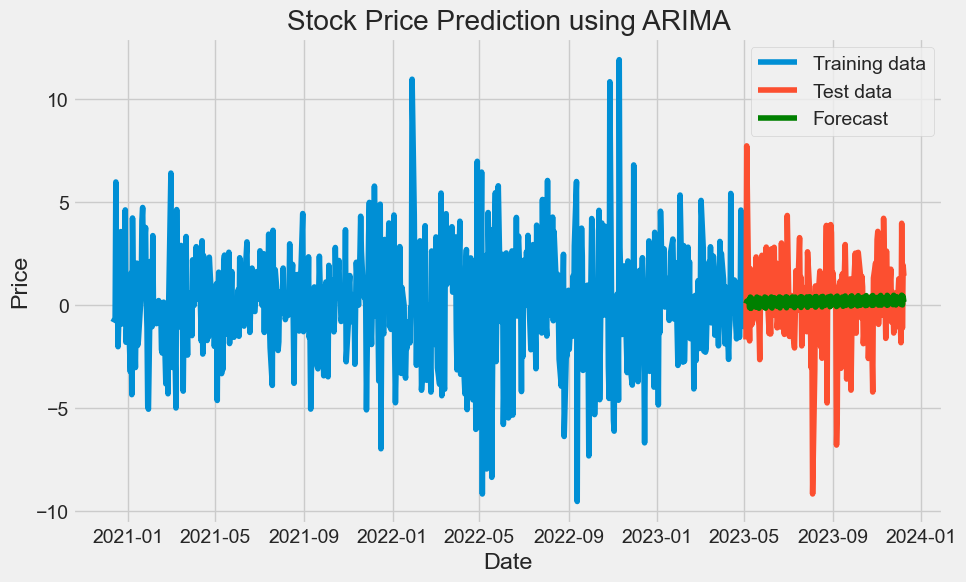

In [219]:
# Plot the model result
plt.figure(figsize=(10, 6))

plt.plot(train.index, train, label='Training data')
plt.plot(test.index, test, label='Test data')
plt.plot(test.index, fc, label='Forecast', color='green')

plt.title('Stock Price Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.savefig('images/arima-result')
plt.show()

Above time series model performs a search over various combinations of p, d, q values, evaluates each combination's RMSE on the test data, and selects the order parameters that yield the lowest RMSE. Finally, it fits the ARIMA model with the best order parameters and generates the forecast.

### Build LSTM model for stock price prediction

Create an LSTM model using Keras and TensorFlow to predict stock prices, following are the steps taken.
- Extract the AAPL stock price data from the dataset for prediction
- Normalizes the data
- Split the data into training and test sets
- Create sequences for the LSTM
- Build the model architecture
- Train the model
- Make predictions 
- Plot the predicted values against the actual stock prices

In [209]:
# import packages for LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [255]:
# Fetch the AAPL price from the dataset
df = adj_closing_df[['AAPL']]
df.reset_index(inplace=True)
df.columns = ['Date', 'Price']

# Normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(df['Price']).reshape(-1, 1))

# Splitting the data into training and testing sets
training_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[0:training_size, :], scaled_data[training_size:len(scaled_data), :]

In [256]:
# Function to create dataset used for creating training and test sets
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [257]:
# create training and test sets
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshaping input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [258]:
# Creating the LSTM model
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(units=1))

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [264]:
##### Fitting the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=10, verbose=1)

# Predicting future stock prices
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform to revert normalization
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((test_predict - y_test) ** 2)))
mae = mean_absolute_error(test_predict, y_test)

print(f"RMSE for LSTM: {rmse}")
print(f"MAE for LSTM: {mae}")

# Get the score of the model
score = model.evaluate(X_test, y_test)
print(f"Score (Loss): {score}")

Epoch 1/25
51/51 [==============================] - 6s 127ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 2/25
51/51 [==============================] - 6s 120ms/step - loss: 0.0012 - val_loss: 7.2549e-04
Epoch 3/25
51/51 [==============================] - 6s 117ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 4/25
51/51 [==============================] - 6s 120ms/step - loss: 0.0012 - val_loss: 9.7942e-04
Epoch 5/25
51/51 [==============================] - 6s 121ms/step - loss: 0.0012 - val_loss: 9.6007e-04
Epoch 6/25
51/51 [==============================] - 7s 134ms/step - loss: 0.0012 - val_loss: 8.2864e-04
Epoch 7/25
51/51 [==============================] - 7s 135ms/step - loss: 0.0012 - val_loss: 7.4449e-04
Epoch 8/25
51/51 [==============================] - 7s 136ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 9/25
51/51 [==============================] - 7s 132ms/step - loss: 0.0012 - val_loss: 5.5346e-04
Epoch 10/25
51/51 [==============================] - 6s 122ms/step - loss: 0

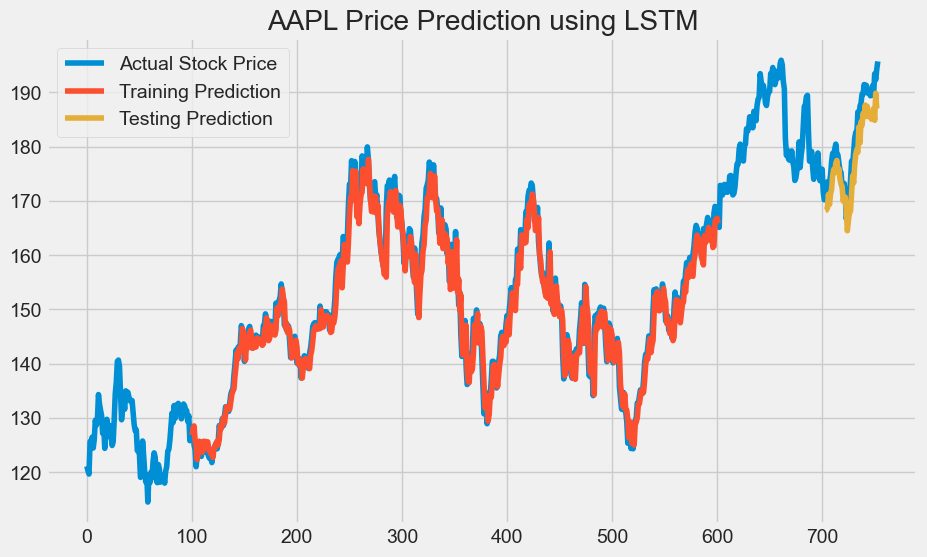

In [265]:
# Plotting the results
look_back = time_step
trainPredictPlot = np.empty_like(scaled_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

testPredictPlot = np.empty_like(scaled_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(scaled_data) - 1, :] = test_predict

plt.figure(figsize=(10, 6))
plt.title('AAPL Price Prediction using LSTM')
plt.plot(scaler.inverse_transform(scaled_data), label='Actual Stock Price')
plt.plot(trainPredictPlot, label='Training Prediction')
plt.plot(testPredictPlot, label='Testing Prediction')
plt.legend()
plt.savefig('images/lstm-result')
plt.show()

# Evaluation

This stock price prediction analysis employed a diverse set of modeling techniques to forecast future stock prices. Multiple models, including Linear Regression, KNeighbors Regressor,Random Forest, ARIMA, LSTM, among others, were utilized to capture different aspects of the stock market dynamics.

The performance of these models was assessed using various evaluation metrics such as Root Mean Squared Error (RMSE), R-squared (R2) score, and Mean Absolute Error (MAE). Each model was trained on historical stock price data and evaluated on a test dataset to measure its predictive capabilities.

Overall, each model showcased unique strengths and varying performance levels, with some surpassing others in accuracy and reliability. Models like KNeighbors and Random Forest exhibited robustness and predictive power, yielding lower RMSE and higher R2 scores compared to simpler model like Linear Regression. The ARIMA model exhibited competitive performance, while LSTM demonstrated potential in capturing long-term dependencies but required further optimization.

## Regression Models (Linear Regression, KNeighbors Regressor, Random Forest)

The KNeighbors Regressor and Random Forest Regressor exhibited better performance compared to Linear Regression, achieving accuracies exceeding 98% and demonstrating reduced RMSE values, results were observed with following specified hyperparameters.

![Stock Price Predection Using Regression](images/regression-result-all.png)

## Time Series (ARIMA)

The ARIMA model was evaluated on a test dataset using various evaluation metrics:

- **RMSE (Root Mean Squared Error):** The ARIMA model achieved an RMSE of 2.13, indicating the average difference between predicted and actual values.
  
- **MAE (Mean Absolute Error):** With an MAE of 1.57, the ARIMA model showcased the absolute average difference between forecasted and observed values.

![Stock Price Predection Using ARIMA](images/arima-summary.png)

### Visualization

The model's predictions were visualized against the actual values:

![Stock Price Predection Using ARIMA](images/arima-result.png)

### Parameter Performance

Parameters (p, d, q) used in the ARIMA model:
- p (AR parameter): 4
- d (Differencing): 2
- q (MA parameter): 4

The model's performance was notably affected by the chosen parameters. Adjusting these values might improve future predictions.

## LSTM

The LSTM model was evaluated using following key performance metrics:

**RMSE (Root Mean Squared Error):** The LSTM model achieved an RMSE of 176.59, signifying the average difference between predicted and actual stock prices.

**MAE (Mean Absolute Error):** With an MAE of 176.44, the model showcased the absolute average difference between forecasted and observed stock prices.

![Stock Price Predection Using LSTM](images/lstm-summary.png)

### Forecast Visualization

The model's predictions were visualized against the actual stock prices:

![Stock Price Predection Using LSTM](images/lstm-result.png)

# Conclusion

In this case study, built various predictive models, including linear regression, KNeighbors Regressor, Random Forest, ARIMA, and LSTM to forecast stock prices. Each model offered distinct strengths and demonstrated varying degrees of performance in capturing the complexities of stock market dynamics.

**Model Performance :**

* **Linear Regression:** Provided a simple baseline but lacked the complexity to capture intricate market behaviors, resulting in limited accuracy.   
* **KNeighbors Regressor:** model demonstrated strong predictive capabilities with high accuracy and reliability and lower RMSE showcasing its efficacy in handling complex patterns within the dataset.     
* **Random Forest:** Showcased robustness in handling nonlinear relationships, achieving higher accuracy and lower RMSE, especially in medium-term predictions.     
* **ARIMA:** Exhibited competitive performance, particularly in capturing short-term trends, with a lower RMSE compared to simpler models.     
* **LSTM:** Demonstrated potential in capturing long-term dependencies but required further optimization to enhance its generalization and reduce prediction errors.

**Future Directions:**

* Experiment with Advanced Techniques: Incorporate advanced deep learning architectures or ensemble methods to harness the strengths of various models.
* Incorporate External Factors: Integrate external factors (e.g., economic indicators, news sentiment) for a more comprehensive predictive model.
* Continuous Evaluation: Regularly assess and update models to adapt to evolving market dynamics.

## Next steps and recommendations

**Hyperparameter Optimization:** Conduct thorough hyperparameter tuning for existing models (e.g. ARIMA, LSTM) to further enhance predictive performance.    
**Ensemble Methods:** Explore ensemble techniques like stacking or blending to combine predictions from multiple models for improved accuracy.      
**Additional Features:** Consider incorporating external data sources or derived features to capture more relevant information.   
**Sequence Length Optimization:** Experiment with different sequence lengths in LSTM or other time-aware models to capture temporal dependencies more effectively.       
**Incorporate External Indicators:** Integrate economic indicators, news sentiment, or social media data to improve the model's predictive power.      
**Model Updates:** Regularly retrain and update models using the latest data to adapt to evolving market dynamics.